In [29]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv("concatenated_data.csv",parse_dates=['Posting Date'])
df.head()

C:\Users\surit\AppData\Local\Temp\ipykernel_24472\1461912451.py:1: DtypeWarning: Columns (12,19,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("concatenated_data.csv",parse_dates=['Posting Date'])


,Control1000000015,Posting Date,Projects Code,Item No.,Document No.,Issue Note No.,Item Description,Quantity,Resource No.,Resource FA No.,...,Shipped Qty. Not Returned,Variant Code,Vendor No.,Entry No.,Gen. Prod. Posting Group,PO Ref. No.,Sub. Project,Positive,Project No.,Vendor Name
0,GOODS IN TRANSIT,2019-04-01,4-01200,70470,207994,NaN,DIESEL,-174.0,NaN,NaN,...,0.0,NaN,NaN,3262413,FUEL,NaN,NaN,False,NaN,NaN
1,GOODS IN TRANSIT,2019-04-01,4-01200,70470,207994,NaN,DIESEL,174.0,NaN,NaN,...,0.0,NaN,NaN,3262414,FUEL,NaN,NaN,True,NaN,NaN
2,GOODS IN TRANSIT,2019-04-01,6-00600,70470,207995,NaN,DIESEL,-30.0,NaN,NaN,...,0.0,NaN,NaN,3262416,FUEL,NaN,NaN,False,NaN,NaN
3,GOODS IN TRANSIT,2019-04-01,6-00600,70470,207995,NaN,DIESEL,30.0,NaN,NaN,...,0.0,NaN,NaN,3262417,FUEL,NaN,NaN,True,NaN,NaN
4,GOODS IN TRANSIT,2019-04-01,6-00600,70470,207996,NaN,DIESEL,-30.0,NaN,NaN,...,0.0,NaN,NaN,3262449,FUEL,NaN,NaN,False,NaN,NaN


In [31]:
df.columns

Index(['Control1000000015', 'Posting Date', 'Projects Code', 'Item No.',
       'Document No.', 'Issue Note No.', 'Item Description', 'Quantity',
       'Resource No.', 'Resource FA No.', 'Resource Reg. No.', 'Description 2',
       'Subcontractor', 'Carcass No.', 'Referred Item', 'Unit of Measure',
       'Cost Amount (Actual)', 'Location Code', 'Applied Entry to Adjust',
       'Description', 'Completely Invoiced', 'Cost Amount (Actual) (ACY)',
       'Control1000000014', 'Cost Amount (Expected)',
       'Cost Amount (Expected) (ACY)', 'Cost Amount (Non-Invtbl.)',
       'Cost Amount (Non-Invtbl.)(ACY)', 'Document Line No.', 'Document Type',
       'Entry Type', 'Expiration Date', 'Invoiced Quantity', 'Lot No.',
       'Maintenance Order No.', 'Maintenance Order Type', 'Open',
       'Order Line No.', 'Order No.', 'Order Type',
       'Prod. Order Comp. Line No.', 'Project Task No.',
       'Qty. per Unit of Measure', 'Remaining Quantity', 'Reserved Quantity',
       'Return Reason C

In [32]:
df[['Posting Date','Quantity']]

,Posting Date,Quantity
0,2019-04-01,-174.0
1,2019-04-01,174.0
2,2019-04-01,-30.0
3,2019-04-01,30.0
4,2019-04-01,-30.0
...,...,...
123057,2022-03-31,-60.0
123058,2022-03-31,-280.0
123059,2022-03-31,-1300.0
123060,2022-03-30,-190.0


In [33]:
df.dtypes

Control1000000015                         object
Posting Date                      datetime64[ns]
Projects Code                             object
Item No.                                   int64
Document No.                              object
Issue Note No.                            object
Item Description                          object
Quantity                                 float64
Resource No.                              object
Resource FA No.                           object
Resource Reg. No.                         object
Description 2                             object
Subcontractor                             object
Carcass No.                              float64
Referred Item                            float64
Unit of Measure                           object
Cost Amount (Actual)                     float64
Location Code                             object
Applied Entry to Adjust                     bool
Description                               object
Completely Invoiced 

In [34]:
df.isnull().sum()

Control1000000015                      0
Posting Date                           0
Projects Code                          0
Item No.                               0
Document No.                           0
Issue Note No.                     43057
Item Description                       0
Quantity                               0
Resource No.                       68031
Resource FA No.                    71362
Resource Reg. No.                  98466
Description 2                      86768
Subcontractor                     121700
Carcass No.                       123062
Referred Item                     123036
Unit of Measure                       18
Cost Amount (Actual)                   0
Location Code                          0
Applied Entry to Adjust                0
Description                       123052
Completely Invoiced                    0
Cost Amount (Actual) (ACY)             0
Control1000000014                      0
Cost Amount (Expected)                 0
Cost Amount (Exp

In [35]:
# Remove columns that have any null values
df = df.dropna(axis=1)

In [36]:
df = df[df['Control1000000015'] == 'FUEL -SITE']

In [37]:
df.shape

(71068, 33)

In [38]:
df.isnull().sum()

Control1000000015                 0
Posting Date                      0
Projects Code                     0
Item No.                          0
Document No.                      0
Item Description                  0
Quantity                          0
Cost Amount (Actual)              0
Location Code                     0
Applied Entry to Adjust           0
Completely Invoiced               0
Cost Amount (Actual) (ACY)        0
Control1000000014                 0
Cost Amount (Expected)            0
Cost Amount (Expected) (ACY)      0
Cost Amount (Non-Invtbl.)         0
Cost Amount (Non-Invtbl.)(ACY)    0
Document Line No.                 0
Entry Type                        0
Invoiced Quantity                 0
Open                              0
Order Line No.                    0
Prod. Order Comp. Line No.        0
Qty. per Unit of Measure          0
Remaining Quantity                0
Reserved Quantity                 0
Sales Amount (Actual)             0
Sales Amount (Expected)     

In [39]:
from sklearn.preprocessing import LabelEncoder

def encode_object_bool_features(df):
    df = df.copy()  # make a copy of the dataframe
    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == object:
            df.loc[:, column] = le.fit_transform(df.loc[:, column])  # use .loc accessor to modify the original dataframe
        elif df[column].dtype == bool:
            df.loc[:, column] = df.loc[:, column].map({False: 0, True: 1})  # use .loc accessor to modify the original dataframe
    return df


In [40]:
df = encode_object_bool_features(df)

C:\Users\surit\AppData\Local\Temp\ipykernel_24472\1504834376.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, column] = le.fit_transform(df.loc[:, column])  # use .loc accessor to modify the original dataframe
C:\Users\surit\AppData\Local\Temp\ipykernel_24472\1504834376.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, column] = le.fit_transform(df.loc[:, column])  # use .loc accessor to modify the original dataframe
C:\Users\surit\AppData\Local\Temp\ipykernel_24472\1504834376.py:8: FutureWarning: In a future version, `df.ilo

In [41]:
df.columns

Index(['Control1000000015', 'Posting Date', 'Projects Code', 'Item No.',
       'Document No.', 'Item Description', 'Quantity', 'Cost Amount (Actual)',
       'Location Code', 'Applied Entry to Adjust', 'Completely Invoiced',
       'Cost Amount (Actual) (ACY)', 'Control1000000014',
       'Cost Amount (Expected)', 'Cost Amount (Expected) (ACY)',
       'Cost Amount (Non-Invtbl.)', 'Cost Amount (Non-Invtbl.)(ACY)',
       'Document Line No.', 'Entry Type', 'Invoiced Quantity', 'Open',
       'Order Line No.', 'Prod. Order Comp. Line No.',
       'Qty. per Unit of Measure', 'Remaining Quantity', 'Reserved Quantity',
       'Sales Amount (Actual)', 'Sales Amount (Expected)', 'Sbu Code',
       'Shipped Qty. Not Returned', 'Entry No.', 'Gen. Prod. Posting Group',
       'Positive'],
      dtype='object')

In [42]:
df.set_index('Posting Date', inplace=True)

In [43]:
df.head()

,Control1000000015,Projects Code,Item No.,Document No.,Item Description,Quantity,Cost Amount (Actual),Location Code,Applied Entry to Adjust,Completely Invoiced,...,Qty. per Unit of Measure,Remaining Quantity,Reserved Quantity,Sales Amount (Actual),Sales Amount (Expected),Sbu Code,Shipped Qty. Not Returned,Entry No.,Gen. Prod. Posting Group,Positive
Posting Date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,0,55,70470,10853,0,-100.0,-10350.0,78,0,1,...,1.0,0.0,0,0,0,2,-100.0,3263084,0,0
2019-04-01,0,55,70470,10854,0,-100.0,-10350.0,78,0,1,...,1.0,0.0,0,0,0,2,-100.0,3264413,0,0
2019-04-01,0,55,70470,10854,0,-100.0,-10350.0,78,0,1,...,1.0,0.0,0,0,0,2,-100.0,3264414,0,0
2019-04-01,0,55,70470,10854,0,-85.0,-8797.5,78,0,1,...,1.0,0.0,0,0,0,2,-85.0,3264415,0,0
2019-04-01,0,55,70470,10854,0,-73.0,-7555.5,78,0,1,...,1.0,0.0,0,0,0,2,-73.0,3264416,0,0


In [44]:
df.loc[:,'QuantityAbs'] = df['Quantity'].abs()

In [45]:
df.drop(columns=['Quantity','Control1000000015'],inplace=True)

In [46]:
df.head()

,Projects Code,Item No.,Document No.,Item Description,Cost Amount (Actual),Location Code,Applied Entry to Adjust,Completely Invoiced,Cost Amount (Actual) (ACY),Control1000000014,...,Remaining Quantity,Reserved Quantity,Sales Amount (Actual),Sales Amount (Expected),Sbu Code,Shipped Qty. Not Returned,Entry No.,Gen. Prod. Posting Group,Positive,QuantityAbs
Posting Date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,55,70470,10853,0,-10350.0,78,0,1,0,0,...,0.0,0,0,0,2,-100.0,3263084,0,0,100.0
2019-04-01,55,70470,10854,0,-10350.0,78,0,1,0,0,...,0.0,0,0,0,2,-100.0,3264413,0,0,100.0
2019-04-01,55,70470,10854,0,-10350.0,78,0,1,0,0,...,0.0,0,0,0,2,-100.0,3264414,0,0,100.0
2019-04-01,55,70470,10854,0,-8797.5,78,0,1,0,0,...,0.0,0,0,0,2,-85.0,3264415,0,0,85.0
2019-04-01,55,70470,10854,0,-7555.5,78,0,1,0,0,...,0.0,0,0,0,2,-73.0,3264416,0,0,73.0


In [47]:
df[['QuantityAbs']]

,QuantityAbs
Posting Date,
2019-04-01,100.0
2019-04-01,100.0
2019-04-01,100.0
2019-04-01,85.0
2019-04-01,73.0
...,...
2022-03-31,10.0
2022-03-28,30.0
2022-03-26,30.0


In [48]:
# Calculate the mean for each date
mean_by_date = df.groupby(df.index.date).mean()
mean_by_date[['QuantityAbs']]

,QuantityAbs
2019-04-01,98.691176
2019-04-02,123.275281
2019-04-03,135.882667
2019-04-04,87.690052
2019-04-05,92.410526
...,...
2022-03-27,76.755556
2022-03-28,61.758242
2022-03-29,51.951613
2022-03-30,54.173750


In [49]:
# Convert the index to a date type
mean_by_date.index = pd.to_datetime(mean_by_date.index)

In [50]:
# mean_by_date = mean_by_date[['QuantityAbs']]
# mean_by_date

In [51]:
#  Resample data to monthly frequency and select the last value for each month
# monthly_data = df['QuantityAbs'].resample('M').last()

In [52]:
train = mean_by_date.loc[mean_by_date.index < '2021-03-31']
test = mean_by_date.loc[mean_by_date.index >= '2021-03-31']

X_train = train.drop(columns='QuantityAbs')
y_train = train[['QuantityAbs']]

X_test = test.drop(columns='QuantityAbs')
y_test = test['QuantityAbs']

In [53]:
y_test.to_csv('y_test.csv')

In [54]:
y_train.max()

QuantityAbs    883.417308
dtype: float64

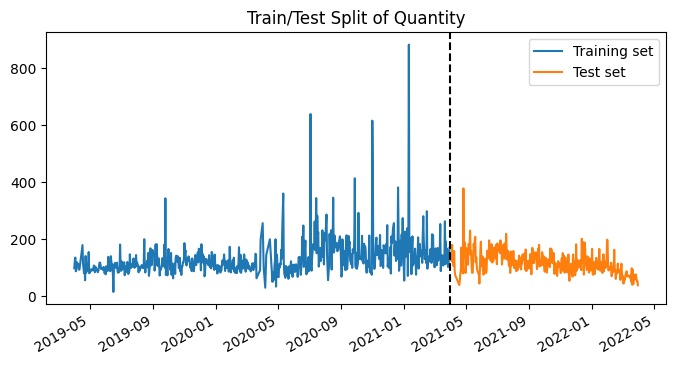

In [55]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,4))
train['QuantityAbs'].plot(ax=ax, label='Training set')
test['QuantityAbs'].plot(ax=ax, label='Test set')
ax.legend()
plt.title("Train/Test Split of Quantity")
ax.axvline('2021-03-31', color='black', ls='--')
plt.show()

In [56]:
def calculate_accuracy(y_test, y_pred):

    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    # Calculate the mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate the mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate the R-squared score
    r2 = r2_score(y_test, y_pred)

    # Print the results
    print('MSE:', mse)
    print('MAE:', mae)
    print('R-squared:', r2)

In [57]:
# from xgboost import XGBRegressor
# reg = XGBRegressor(n_estimators=100, learning_rate = 0.1)
# reg.fit(X_train,y_train)
# predictions = reg.predict(X_test) 

# from sklearn.metrics import mean_absolute_error
# print("Accuracy of the train set: {:.3f}".format(reg.score(X_train,y_train)))
# print("Accuracy of the test set: {:.3f}".format(reg.score(X_test,y_test)))
# print("MSE of the test set: {:.3f}".format(mean_absolute_error(y_test,predictions)))

### Simple Moving Average (SMA)

C:\Users\surit\AppData\Local\Temp\ipykernel_24472\2014781567.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_forecast = mean_by_date.append(forecast)


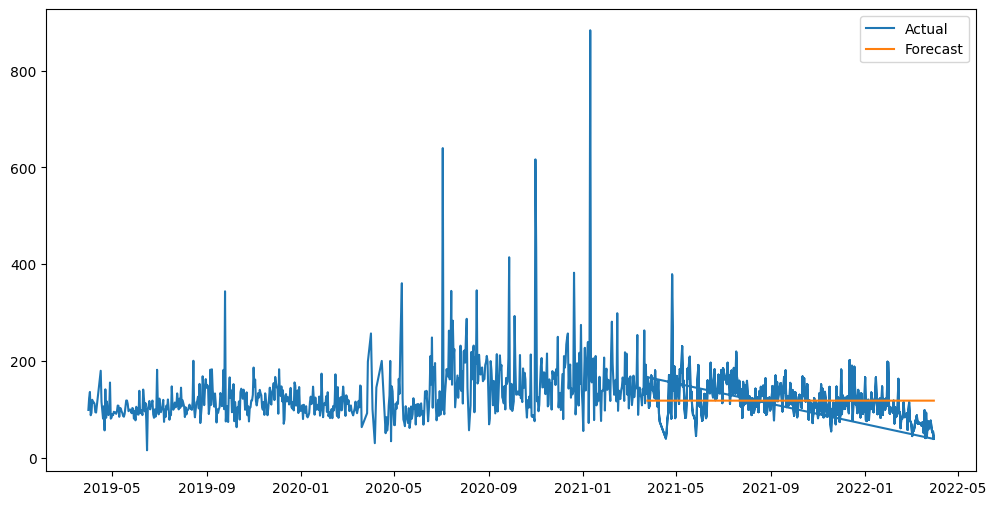

            QuantityAbs    Forecast
2021-03-25   166.434722  117.889288
2021-03-26   152.658507  117.889288
2021-03-27   102.714151  117.889288
2021-03-28   108.153846  117.889288
2021-03-29   146.580000  117.889288
...                 ...         ...
2022-03-27    76.755556  117.889288
2022-03-28    61.758242  117.889288
2022-03-29    51.951613  117.889288
2022-03-30    54.173750  117.889288
2022-03-31    38.690909  117.889288

[365 rows x 2 columns]
MSE: 1464.403174624289
MAE: 29.622479284904852
R-squared: 0.0


In [58]:
window_size = 365
sma = mean_by_date['QuantityAbs'].rolling(window=window_size).mean()

last_values = mean_by_date['QuantityAbs'][-window_size:]
forecast = pd.DataFrame(last_values, columns=['QuantityAbs'], index=last_values.index)
forecast['SMA'] = forecast['QuantityAbs'].rolling(window=window_size).mean()
forecast['Forecast'] = forecast['SMA'].iloc[-1]

df_forecast = mean_by_date.append(forecast)

plt.figure(figsize=(12,6))
plt.plot(df_forecast['QuantityAbs'], label='Actual')
plt.plot(df_forecast['Forecast'], label='Forecast')
plt.legend()
plt.show()

forecast.drop(columns='SMA',inplace=True)
print(forecast)

calculate_accuracy(forecast['QuantityAbs'], forecast['Forecast'])

In [59]:
df_F = y_train.asfreq('D')
df_F

,QuantityAbs
2019-04-01,98.691176
2019-04-02,123.275281
2019-04-03,135.882667
2019-04-04,87.690052
2019-04-05,92.410526
...,...
2021-03-26,152.658507
2021-03-27,102.714151
2021-03-28,108.153846
2021-03-29,146.580000


 ### Exponential Smoothing (SES) - [Best one]

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


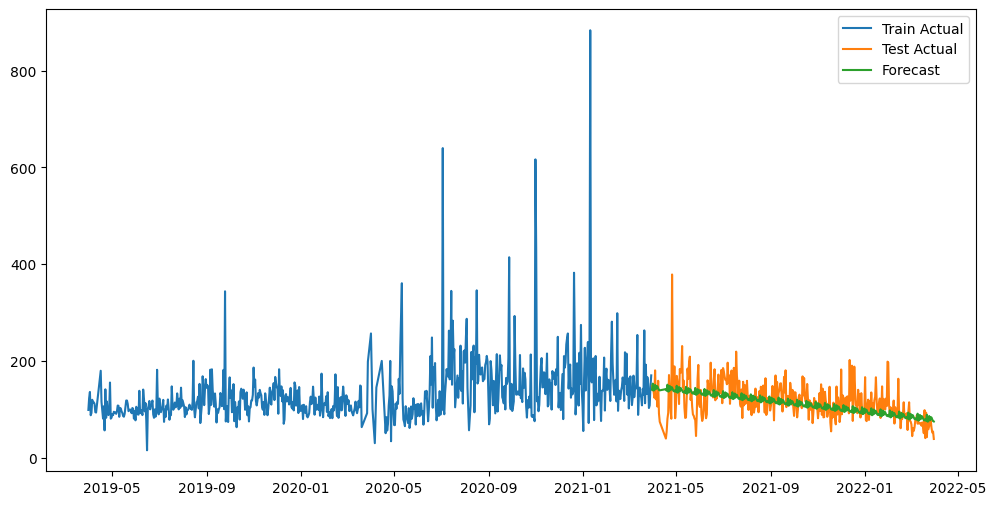

MSE: 1231.539295589012
MAE: 25.59061097429985
R-squared: 0.16107170419338535


In [61]:
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

# Fit SES to the training set
model_ES = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12).fit()

# Generate forecasts for the testing set
y_pred_ses = model_ES.forecast(len(y_test))

# Plot the actual values and forecast
plt.figure(figsize=(12,6))
plt.plot(y_train.index, y_train.values, label='Train Actual')
plt.plot(y_test.index, y_test.values, label='Test Actual')
plt.plot(y_test.index, y_pred_ses, label='Forecast')
plt.legend()
plt.show()
    
calculate_accuracy(y_test, y_pred_ses) #mse is 25

In [34]:
y_pred_ses

697     140.466249
698     153.053138
699     138.842992
700     139.813190
701     150.410619
           ...    
1051     83.892055
1052     82.954987
1053     78.852711
1054     75.632270
1055     74.823198
Length: 359, dtype: float64

### ARIMA

In [62]:
from statsmodels.tsa.arima.model import ARIMA
df_F = y_train.asfreq('D')

model_ARIMA = ARIMA(df_F, order=(1, 1, 1), seasonal_order=(0, 1, 0, 60)).fit()
y_pred_arima = model_ARIMA.forecast(len(y_test))

print(y_pred_arima)
calculate_accuracy(y_test,y_pred_arima)

2021-03-31    161.589982
2021-04-01    169.444436
2021-04-02    124.574973
2021-04-03    145.334482
2021-04-04    144.156407
                 ...    
2022-03-20     71.901236
2022-03-21     58.125021
2022-03-22      8.180664
2022-03-23     13.620360
2022-03-24     52.046514
Freq: D, Name: predicted_mean, Length: 359, dtype: float64
MSE: 3401.5712330528504
MAE: 46.51761523396449
R-squared: -1.31716061990941


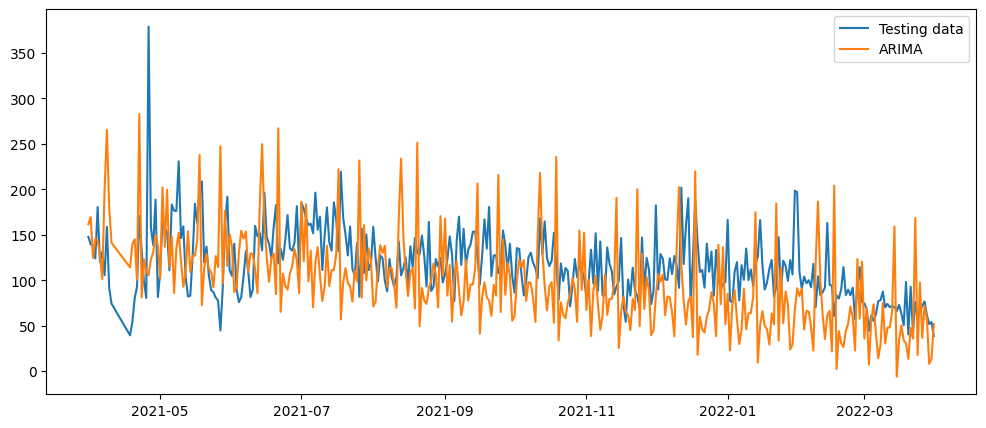

In [63]:
plt.figure(figsize=(12, 5))
# plt.plot(y_train.index, y_train, label='Training data')
plt.plot(y_test.index, y_test, label='Testing data')
plt.plot(y_test.index, y_pred_arima, label='ARIMA')
plt.legend()

### Neural Network model

In [39]:
from keras.models import Sequential
from keras.layers import Dense

X_train_nn = np.array(train.drop(columns=['QuantityAbs']))
y_train_nn = np.array(train['QuantityAbs'])
X_test_nn = np.array(test.drop(columns=['QuantityAbs']))
y_test_nn = np.array(test['QuantityAbs'])

model_nn = Sequential()
model_nn.add(Dense(16, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

model_nn.compile(loss='mean_squared_error', optimizer='adam')
model_nn.fit(X_train_nn, y_train_nn, epochs=200, batch_size=32)

y_pred_nn = model_nn.predict(X_test_nn).flatten()
accuracy_nn = calculate_accuracy(y_test_nn, y_pred_nn)

Epoch 1/200
22/22 [==============================] - 1s 2ms/step - loss: 7504392192.0000
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 402884352.0000
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 33470308.0000
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 3445215.0000
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 620561.5000
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 41764.6328
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 8075.2036
Epoch 8/200
22/22 [==============================] - 0s 3ms/step - loss: 2327.5833
Epoch 9/200
22/22 [==============================] - 0s 2ms/step - loss: 2080.1943
Epoch 10/200
22/22 [==============================] - 0s 2ms/step - loss: 2007.0688
Epoch 11/200
22/22 [==============================] - 0s 5ms/step - loss: 2014.8214
Epoch 12/200
22/22 [==============================] - 0s 5ms/ste

In [40]:
model_nn.evaluate(X_test_nn,y_test_nn)

12/12 [==============================] - 0s 2ms/step - loss: 13121.5039


13121.50390625

### Croston

MSE: 2611.681333376289
MAE: 42.942214386611376
R-squared: -0.7790852293928752


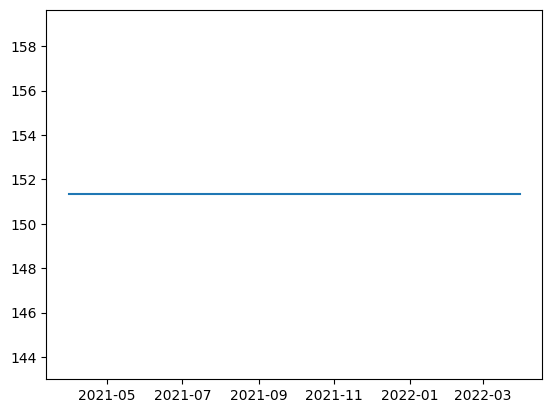

In [ ]:
from croston import croston

# croston's method
fit_pred = croston.fit_croston(y_train, 359, 'original')

fit_pred['croston_fittedvalues'] 
fit_pred['croston_forecast']

plt.plot(y_test.index, fit_pred['croston_forecast'])

calculate_accuracy(y_test,fit_pred['croston_forecast'])

Saving the model

In [41]:
import pickle

# Save model as a file
with open('ES_model.pkl', 'wb') as f:
    pickle.dump(model_ES, f) #Exponential Smoothing is used 
    
#Replace model_ES to any other model